In [502]:
import pandas as pd

In [503]:
pfp = pd.read_csv(
    'philippines-food-prices-1.csv', sep=",", encoding="ISO-8859-1", header=0
)

print(pfp.shape)


(18269, 17)


In [504]:
pfp.head(5)

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn,default
0,#date,#item+name,#item+unit,#item+type,#value,#currency,#country+name,#adm1+name,#adm1+code,#name+market,NaN,#item+code,NaN,NaN,#item+type+code,#meta+id,NaN
1,2010-01-15,"Rice (regular, milled) - Retail",KG,cereals and tubers,29.2,PHP,Philippines,Cordillera Administrative region (CAR),2354,La Trinidad,168.0,80,15.0,5.0,1,168_80_15_5,1.0
2,2010-02-15,"Rice (regular, milled) - Retail",KG,cereals and tubers,30.0,PHP,Philippines,Cordillera Administrative region (CAR),2354,La Trinidad,168.0,80,15.0,5.0,1,168_80_15_5,1.0
3,2010-03-15,"Rice (regular, milled) - Retail",KG,cereals and tubers,30.0,PHP,Philippines,Cordillera Administrative region (CAR),2354,La Trinidad,168.0,80,15.0,5.0,1,168_80_15_5,1.0
4,2010-04-15,"Rice (regular, milled) - Retail",KG,cereals and tubers,30.0,PHP,Philippines,Cordillera Administrative region (CAR),2354,La Trinidad,168.0,80,15.0,5.0,1,168_80_15_5,1.0


In [505]:
# Drop the first row (index 0) from the DataFrame since it contains description of columns only
pfp = pfp.drop(index=0)

# Reset the index after dropping the row
pfp = pfp.reset_index(drop=True)

# Display the updated DataFrame
pfp.head(5)

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn,default
0,2010-01-15,"Rice (regular, milled) - Retail",KG,cereals and tubers,29.2,PHP,Philippines,Cordillera Administrative region (CAR),2354,La Trinidad,168.0,80,15.0,5.0,1,168_80_15_5,1.0
1,2010-02-15,"Rice (regular, milled) - Retail",KG,cereals and tubers,30.0,PHP,Philippines,Cordillera Administrative region (CAR),2354,La Trinidad,168.0,80,15.0,5.0,1,168_80_15_5,1.0
2,2010-03-15,"Rice (regular, milled) - Retail",KG,cereals and tubers,30.0,PHP,Philippines,Cordillera Administrative region (CAR),2354,La Trinidad,168.0,80,15.0,5.0,1,168_80_15_5,1.0
3,2010-04-15,"Rice (regular, milled) - Retail",KG,cereals and tubers,30.0,PHP,Philippines,Cordillera Administrative region (CAR),2354,La Trinidad,168.0,80,15.0,5.0,1,168_80_15_5,1.0
4,2010-05-15,"Rice (regular, milled) - Retail",KG,cereals and tubers,30.0,PHP,Philippines,Cordillera Administrative region (CAR),2354,La Trinidad,168.0,80,15.0,5.0,1,168_80_15_5,1.0


In [506]:
pfp.sample(5)

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn,default
16565,2012-10-15,Tomatoes - Retail,KG,vegetables and fruits,49.33,PHP,Philippines,Region IV-A (Calabarzon),67166,Santa Cruz,172.0,114,15.0,5.0,4,172_114_15_5,NaN
11873,2009-09-15,Onions (red) - Retail,KG,vegetables and fruits,60.94,PHP,Philippines,Region X (Northern Mindanao),67160,Tubod,179.0,110,15.0,5.0,4,179_110_15_5,NaN
17096,2010-10-15,Rice (paddy) - Farm Gate,KG,cereals and tubers,12.36,PHP,Philippines,Region IV-A (Calabarzon),67166,Santa Cruz,172.0,203,18.0,5.0,1,172_203_18_5,NaN
16277,2009-10-15,Garlic - Retail,KG,vegetables and fruits,189.49,PHP,Philippines,Region IV-A (Calabarzon),67166,Santa Cruz,172.0,105,15.0,5.0,4,172_105_15_5,NaN
13139,2013-04-15,Onions (red) - Retail,KG,vegetables and fruits,73.88,PHP,Philippines,Region XI (Davao Region),67161,Davao City,180.0,110,15.0,5.0,4,180_110_15_5,NaN


In [507]:
# Check unique values of non-descriptive columns
print(f"Currency: {pfp['currency'].unique()}")
print(f"Country: {pfp['country'].unique()}")
print(f"Unit: {pfp['unit'].unique()}")
print(f"Default: {pfp['default'].unique()}")
print(f"ptid: {pfp['ptid'].unique()}")

Currency: ['PHP']
Country: ['Philippines']
Unit: ['KG' 'Unit']
Default: [ 1. nan]
ptid: [15. 14. 18.]


In [508]:
# It is unclear what is the value 'Unit' in the unit column, check products in different unit column values
unit_kg = pfp[pfp['unit'] == 'KG']
unit_unit = pfp[pfp['unit'] == 'Unit']

# Display the filtered rows
print(unit_kg['cmname'].unique())
print(unit_unit['cmname'].unique())

# 'Unit' in unit is used for products that are measured by count, not by weight (ex: eggs). Useful and not to be removed.

['Rice (regular, milled) - Retail' 'Sweet potatoes - Retail'
 'Garlic - Retail' 'Onions (red) - Retail' 'Onions (white) - Retail'
 'Tomatoes - Wholesale' 'Tomatoes - Retail'
 'Groundnuts (unshelled) - Retail'
 'Meat (beef, chops with bones) - Retail' 'Meat (chicken, whole) - Retail'
 'Meat (pork) - Retail' 'Potatoes (Irish) - Retail' 'Carrots - Wholesale'
 'Carrots - Retail' 'Cabbage - Wholesale' 'Cabbage - Retail'
 'Beans (mung) - Retail' 'Fish (fresh) - Retail'
 'Rice (regular, milled) - Wholesale' 'Sweet potatoes - Wholesale'
 'Rice (paddy) - Farm Gate' 'Fish (fresh) - Wholesale']
['Eggs - Retail' 'Eggs - Wholesale']


In [509]:
# It is unclear what default represents, check values when default = 1 and when it is NaN
default_row1 = pfp[pfp['default'] == 1.0]
default_rowNot1 = pfp[pfp['default'] != 1.0]

# Display the filtered rows
print(default_row1['cmname'].unique())
print(default_rowNot1['cmname'].unique())

# the value 1.0 in the column default has a one to one relationship with 'Rice - Retail'. Useless and to be removed.

['Rice (regular, milled) - Retail']
['Sweet potatoes - Retail' 'Eggs - Retail' 'Garlic - Retail'
 'Onions (red) - Retail' 'Onions (white) - Retail' 'Tomatoes - Wholesale'
 'Tomatoes - Retail' 'Groundnuts (unshelled) - Retail'
 'Meat (beef, chops with bones) - Retail' 'Meat (chicken, whole) - Retail'
 'Meat (pork) - Retail' 'Potatoes (Irish) - Retail' 'Carrots - Wholesale'
 'Carrots - Retail' 'Cabbage - Wholesale' 'Cabbage - Retail'
 'Beans (mung) - Retail' 'Fish (fresh) - Retail'
 'Rice (regular, milled) - Wholesale' 'Sweet potatoes - Wholesale'
 'Eggs - Wholesale' 'Rice (paddy) - Farm Gate' 'Fish (fresh) - Wholesale']


In [510]:
# It is unclear what ptid represents, check values when ptid: [14. 15. 18.]
ptid_14 = pfp[pfp['ptid'] == 14.0]
ptid_15 = pfp[pfp['ptid'] == 15.0]
ptid_18 = pfp[pfp['ptid'] == 18.0]

# Display the filtered rows
print(ptid_14['cmname'].unique())
print(ptid_15['cmname'].unique())
print(ptid_18['cmname'].unique())

# ptid represents as ids of wholesale, retail, and farm gate

['Tomatoes - Wholesale' 'Carrots - Wholesale' 'Cabbage - Wholesale'
 'Rice (regular, milled) - Wholesale' 'Sweet potatoes - Wholesale'
 'Eggs - Wholesale' 'Fish (fresh) - Wholesale']
['Rice (regular, milled) - Retail' 'Sweet potatoes - Retail'
 'Eggs - Retail' 'Garlic - Retail' 'Onions (red) - Retail'
 'Onions (white) - Retail' 'Tomatoes - Retail'
 'Groundnuts (unshelled) - Retail'
 'Meat (beef, chops with bones) - Retail' 'Meat (chicken, whole) - Retail'
 'Meat (pork) - Retail' 'Potatoes (Irish) - Retail' 'Carrots - Retail'
 'Cabbage - Retail' 'Beans (mung) - Retail' 'Fish (fresh) - Retail']
['Rice (paddy) - Farm Gate']


In [511]:
# Since every rows use the same currency and is from the same country, both columns are useless.
clean_pfp = pfp
clean_pfp.drop(columns=['currency', 'country', 'default'], inplace=True)

# Specify price is in PHP currency instead of using a column
# default column has no use, we can filter out the 'Rice - Retail' group by using the cmname therefore redundant

In [512]:
# Split cmname into Product Name and Price Type
clean_pfp[['Product Name', 'Price Type']] = clean_pfp['cmname'].str.split('-', n=1, expand=True)

# Remove any extra whitespace from the new columns
clean_pfp['Product Name'] = clean_pfp['Product Name'].str.strip()
clean_pfp['Price Type'] = clean_pfp['Price Type'].str.strip()

clean_pfp.drop(columns=['cmname'], inplace=True)

In [513]:
clean_pfp.sample(5)

,date,unit,category,price,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn,Product Name,Price Type
7415,2009-04-15,KG,"meat, fish and eggs",90.19,Region VII (Central Visayas),2363,Cebu City,176.0,401,15.0,5.0,2,176_401_15_5,Fish (fresh),Retail
6230,2013-01-15,KG,vegetables and fruits,55.23,Region VI (Western Visayas),2362,Iloilo City,175.0,181,15.0,5.0,4,175_181_15_5,Cabbage,Retail
5178,2009-07-15,KG,"meat, fish and eggs",84.5,Region V (Bicol region),2361,Legazpi,174.0,401,15.0,5.0,2,174_401_15_5,Fish (fresh),Retail
15140,2016-08-15,KG,cereals and tubers,36.75,Region III (Central Luzon),67165,Palayan,171.0,87,15.0,5.0,1,171_87_15_5,Sweet potatoes,Retail
5996,2008-01-15,KG,cereals and tubers,55.85,Region VI (Western Visayas),2362,Iloilo City,175.0,148,15.0,5.0,1,175_148_15_5,Potatoes (Irish),Retail


In [514]:
# Check one-to-one relationship of columns and column's id counterpart
# product name-cmid, category-catid, admname-adm1id, mktname-mktid, price type - ptid

# Define the columns and their ID counterparts
relationships = {
    'admname': 'adm1id',
    'mktname': 'mktid',
    'Product Name': 'cmid',
    'Price Type': 'ptid',
    'unit': 'umid',
    'category': 'catid'
}

# Check one-to-one relationships
for col, id_col in relationships.items():
    unique_col = clean_pfp[col].nunique()
    unique_id_col = clean_pfp[id_col].nunique()
    
    # Create a mapping of the main column to the ID column and check for unique pairs
    unique_pairs = clean_pfp[[col, id_col]].drop_duplicates().shape[0]
    
    # Check if unique counts match and if unique pairs match
    if unique_col == unique_id_col == unique_pairs:
        print(f"{col} and {id_col} have a one-to-one relationship.")
    else:
        print(f"{col} and {id_col} do not have a one-to-one relationship.")

admname and adm1id have a one-to-one relationship.
mktname and mktid have a one-to-one relationship.
Product Name and cmid have a one-to-one relationship.
Price Type and ptid have a one-to-one relationship.
unit and umid have a one-to-one relationship.
category and catid have a one-to-one relationship.


In [515]:
# Since the ids have a one-to-one relationship with their counterpart,
# we can remove the ids since they are not useful in analysis

clean_pfp.drop(columns=['cmid', 'ptid', 'catid', 'adm1id', 'mktid', 'umid'], inplace=True)

In [516]:
# Check if there are multiple mktname in admname

# Get unique values for mktname and admname
unique_mktname = clean_pfp['mktname'].nunique()
unique_admname = clean_pfp['admname'].nunique()

# Create a mapping of mktname to admname
mkt_adm_mapping = clean_pfp[['mktname', 'admname']].drop_duplicates()

# Check if the number of unique mktname-admname pairs is equal to the number of unique mktname values
unique_pairs = mkt_adm_mapping.shape[0]

# Determine if there is a one-to-one relationship
if unique_pairs == unique_mktname == unique_admname:
    print("mktname and admname have a one-to-one relationship.")
else:
    print("mktname and admname do not have a one-to-one relationship.")

# Finding insightful analysis per market on a region is not possible since
# there is only one market recorded per region in this dataset.

mktname and admname have a one-to-one relationship.


In [517]:
# Define the desired column order
new_column_order = [
    'date', 
    'Product Name', 
    'category', 
    'price', 
    'unit', 
    'Price Type', 
    'mktname', 
    'admname', 
    'sn'
]

# Reorder the DataFrame columns
clean_pfp = clean_pfp[new_column_order]


In [518]:
clean_pfp.sample(5)

,date,Product Name,category,price,unit,Price Type,mktname,admname,sn
10722,2015-04-15,Sweet potatoes,cereals and tubers,28.66,KG,Retail,Zamboanga City,Region IX (Zamboanga Peninsula),178_87_15_5
15212,2008-06-15,Onions (red),vegetables and fruits,76.23,KG,Retail,Palayan,Region III (Central Luzon),171_110_15_5
15995,2012-07-15,Fish (fresh),"meat, fish and eggs",132.38,KG,Retail,Palayan,Region III (Central Luzon),171_401_15_5
7421,2009-10-15,Fish (fresh),"meat, fish and eggs",82.68,KG,Retail,Cebu City,Region VII (Central Visayas),176_401_15_5
17972,2008-05-15,Carrots,vegetables and fruits,67.38,KG,Retail,Puerto Princesa,Region IV (Southern Tagalog),173_166_15_5


In [519]:
# Check columns and Data Types
print(clean_pfp.dtypes)

date            object
Product Name    object
category        object
price           object
unit            object
Price Type      object
mktname         object
admname         object
sn              object
dtype: object


In [520]:
# Change date datatype as date
clean_pfp['date'] = pd.to_datetime(clean_pfp['date'], errors='coerce')

# Change the 'price' column to float
clean_pfp['price'] = clean_pfp['price'].astype(float)


In [521]:
print(clean_pfp.dtypes)

date            datetime64[ns]
Product Name            object
category                object
price                  float64
unit                    object
Price Type              object
mktname                 object
admname                 object
sn                      object
dtype: object


In [522]:
# Normalize and change column names
new_name = {
    'date': 'Date',
    'category': 'Category',
    'price': 'Price',
    'unit': 'Unit',
    'mktname': 'Market Name',
    'admname': 'Region',
    'sn': 'Meta ID'
}

clean_pfp = clean_pfp.rename(columns=new_name)

In [523]:
clean_pfp.sample(5)

,Date,Product Name,Category,Price,Unit,Price Type,Market Name,Region,Meta ID
9150,2009-05-15,Potatoes (Irish),cereals and tubers,66.00,KG,Retail,Tandag,Region XIII (Caraga),182_148_15_5
16112,2008-12-15,Sweet potatoes,cereals and tubers,25.67,KG,Retail,Santa Cruz,Region IV-A (Calabarzon),172_87_15_5
17656,2012-10-15,Groundnuts (unshelled),pulses and nuts,96.93,KG,Retail,Puerto Princesa,Region IV (Southern Tagalog),173_118_15_5
14585,2011-03-15,Meat (pork),"meat, fish and eggs",156.00,KG,Retail,Koronadal,Region XII (Soccsksargen),181_140_15_5
8934,2013-02-15,Groundnuts (unshelled),pulses and nuts,112.64,KG,Retail,Tandag,Region XIII (Caraga),182_118_15_5


In [524]:
print(clean_pfp.shape)

(18268, 9)


In [525]:
# Check for null values
clean_pfp.isna().sum()

Date            0
Product Name    0
Category        0
Price           0
Unit            0
Price Type      0
Market Name     0
Region          0
Meta ID         0
dtype: int64

In [526]:
# Check for duplicates
duplicates = clean_pfp[clean_pfp.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Date, Product Name, Category, Price, Unit, Price Type, Market Name, Region, Meta ID]
Index: []


In [527]:
clean_pfp.describe()

,Date,Price
count,18268,18268.000000
mean,2012-08-09 05:37:32.069192192,79.491791
min,2000-01-15 00:00:00,1.600000
25%,2010-01-15 00:00:00,33.000000
50%,2012-06-15 00:00:00,61.430000
75%,2015-05-15 00:00:00,120.167500
max,2017-04-15 00:00:00,594.440000
std,NaN,59.929638


## Data Visualization

In [528]:
# Important imports for visualizations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Bar Chart # 1
- Used to visualize the distributtion of 'Category' column in the dataset.

##### Insights:
- Vegetables and Fruit is the most represented category on this dataset, as it has the highest number of counts. This may be due to the country’s tropical climate, which is suitable for vegetable and fruit farming. 
- ‘Meat, fish, and eggs’ comes in next and this may be due to the price and availability of these categories in the philippines. 
- Since it is a known fact that Rice is the staple food of Filipino people, ‘Cereal and tubers’ is expected to have lower counts than the first two categories. 
‘Pulses and nuts’ have the least counts in the dataset. This may be due to the lower consumption compared to other staple foods in the country.

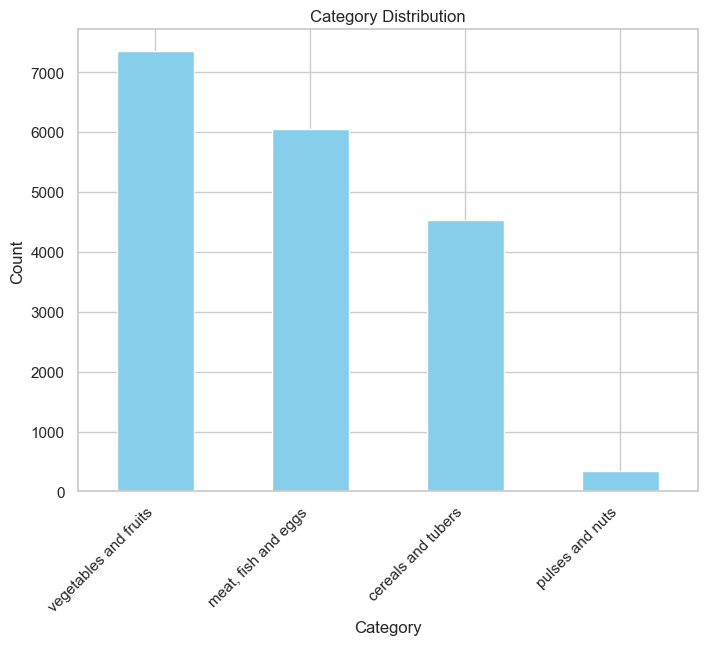

In [529]:
category_counts = clean_pfp['Category'].value_counts()

plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Bar Chart # 2:
- Used to visualize category average prices across the years in the dataset using ‘price’ and ‘category’ columns. 

#### Insights:
- Some categories were not recorded in some years. 
- A consistent increase in the average prices is noticable, indicating inflation of goods over the past years. 
- "Meat, Fish, and Eggs" has the highest average price among all categories and showcases price spikes over the years. This may be due to increased demand and an unstable supply.

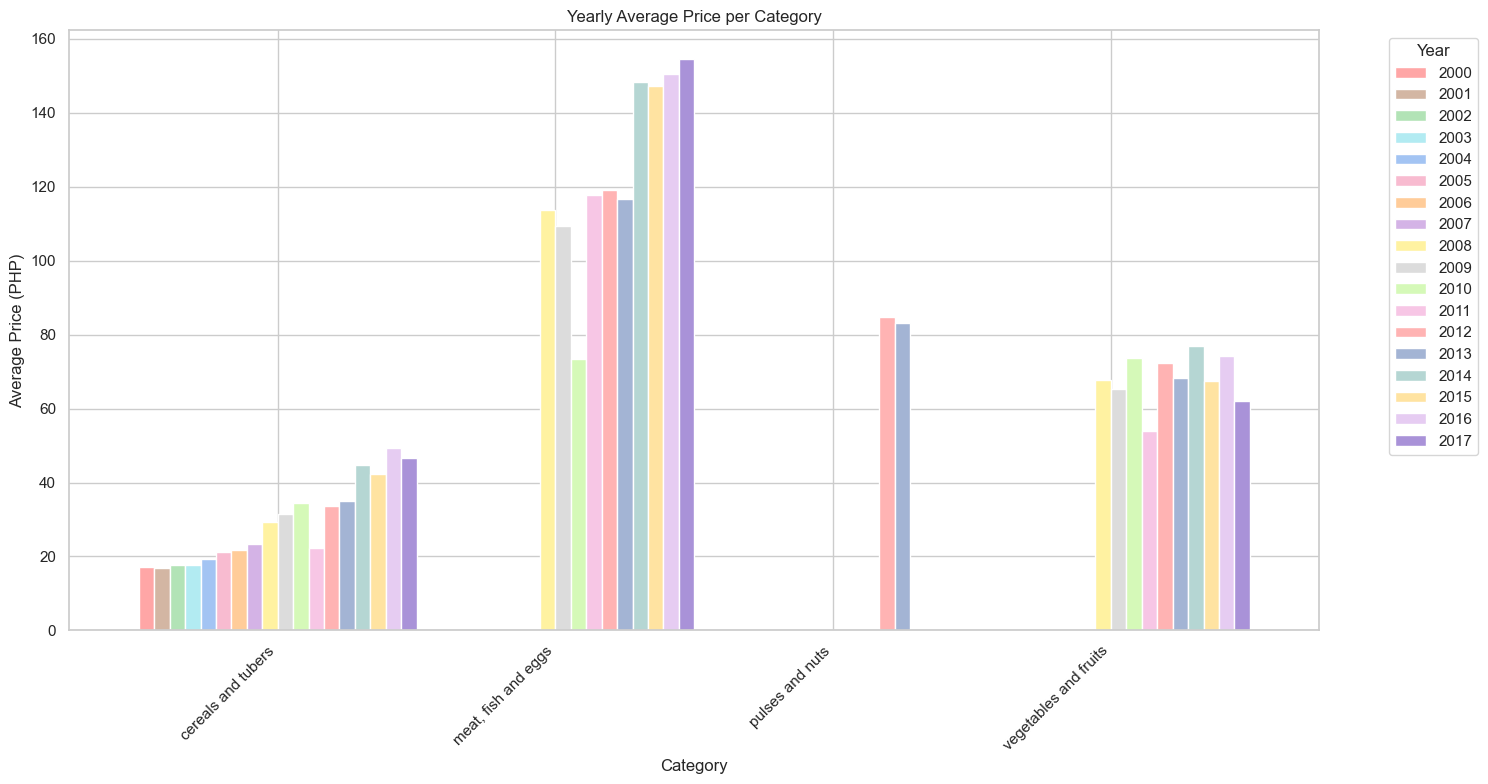

In [530]:
# Convert the 'data' column to datetime format and extract the year
clean_pfp['Year'] = pd.to_datetime(clean_pfp['Date'], format='%d/%m/%Y').dt.year

# Calculate the yearly average price per category
yearly_avg_price = clean_pfp.groupby(['Year', 'Category'])['Price'].mean().reset_index()

# Pivot the DataFrame to have categories as rows and years as columns
pivot_table = yearly_avg_price.pivot(index='Category', columns='Year', values='Price')

colors = [
    '#ffa6a6',  # salmon
    '#d3b6a3',  # brown
    '#b2e3b6',  # green
    '#b2ebf2',  # cyan
    '#a3c4f3',  # blue
    '#f8bbd0',  # pink
    '#ffcc99',  # orange
    '#d4b3e6',  # purple
    '#fff2a1',  # yellow
    '#dcdcdc',  # grey
    '#d5f9b8',  # lime
    '#f7c6e5',  # magenta
    '#ffb3b3',  # red
    '#a3b4d4',  # navy
    '#b5d6d3',  # teal
    '#ffe3a1',  # gold
    '#e6ccf2',  # purple
    '#A992D8'   # dark purple
]

# Plotting
pivot_table.plot(kind='bar', figsize=(15, 8), color=colors,  width=1)
plt.title('Yearly Average Price per Category')
plt.xlabel('Category')
plt.ylabel('Average Price (PHP)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Bar Chart # 3:
- Used to show the number of items available per category in each market in the dataset.

#### Insights:
- The dominance of 'Vegetable and Fruits' is noticable which indicates the high availability rate of the items on this category. Davao City has the highest number of 'Vegetable and Fruit' items compared to other markets. 
- 'Pulses and nuts' have the least representation across all markets, with only a small fraction of the total items. This suggests that pulses and nuts might be less available or traded.
- Most markets shows similar trend and structure for this visualization, indicates that a general trend for food categories that influences availability is present. 

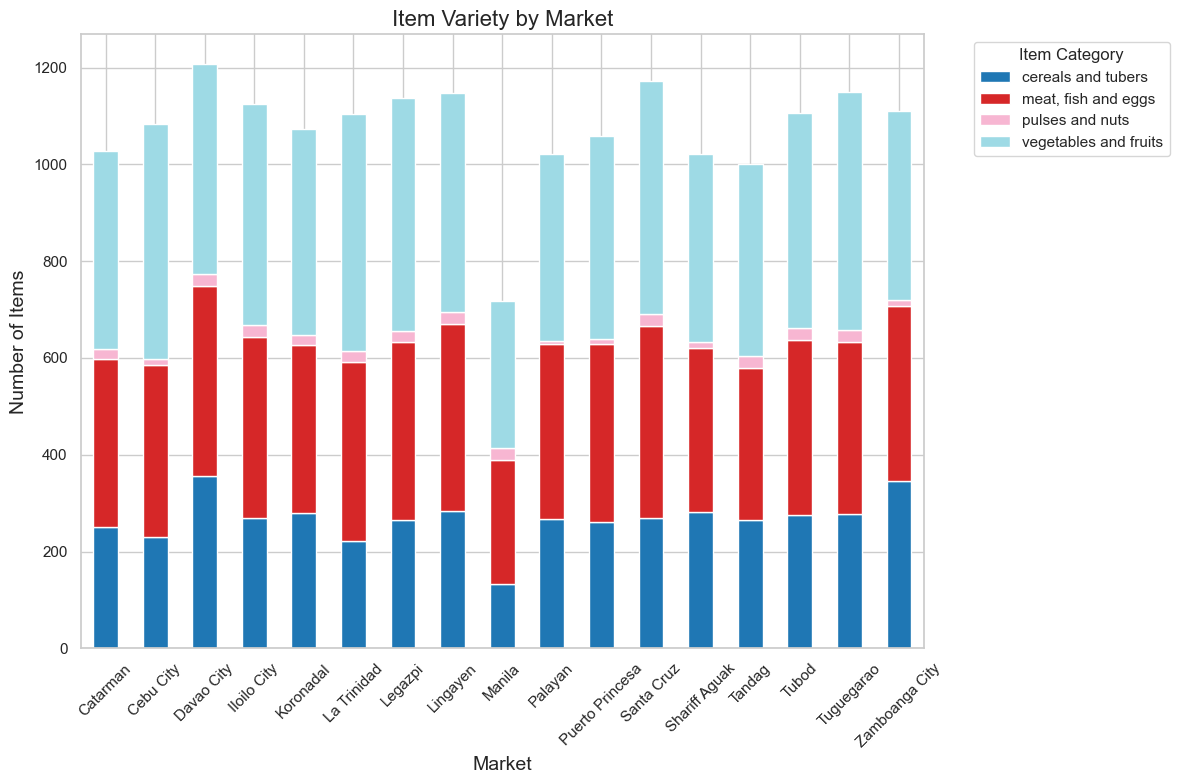

In [531]:
# Count the number of items in each category by market
item_counts = clean_pfp.groupby(['Market Name', 'Category']).size().unstack(fill_value=0)

# Create the stacked bar chart
item_counts.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')

# Add titles and labels
plt.title('Item Variety by Market', fontsize=16)
plt.xlabel('Market', fontsize=14)
plt.ylabel('Number of Items', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Item Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

#### Box Plot:
- Used to visualize and compare prices in different regions and markets in the dataset. 

#### Insights:
- This visualization highlights the regional disparities in item pricing throughout the Philippines, where some regions experience a broader range of prices.
- Outliers may indicate sudden food price spikes, and this may be due to limited supply. 
- La Trinidad does not contribute much in price variability, this may be due to the fact that this region is the source of most food supplies in the country, like vegetables and fruits. 


In [532]:
clean_pfp['Region'].unique()

array(['Cordillera Administrative region (CAR)',
       'National Capital region (NCR)', 'Region I (Ilocos region)',
       'Region II (Cagayan Valley)', 'Region V (Bicol region)',
       'Region VI (Western Visayas)', 'Region VII (Central Visayas)',
       'Region VIII (Eastern Visayas)', 'Region XIII (Caraga)',
       'Autonomous region in Muslim Mindanao (ARMM)',
       'Region IX (Zamboanga Peninsula)', 'Region X (Northern Mindanao)',
       'Region XI (Davao Region)', 'Region XII (Soccsksargen)',
       'Region III (Central Luzon)', 'Region IV-A (Calabarzon)',
       'Region IV (Southern Tagalog)'], dtype=object)

C:\Users\Sara Limeta\AppData\Local\Temp\ipykernel_41784\2605546755.py:26: UserWarning: The palette list has more values (18) than needed (17), which may not be intended.
  sns.boxplot(


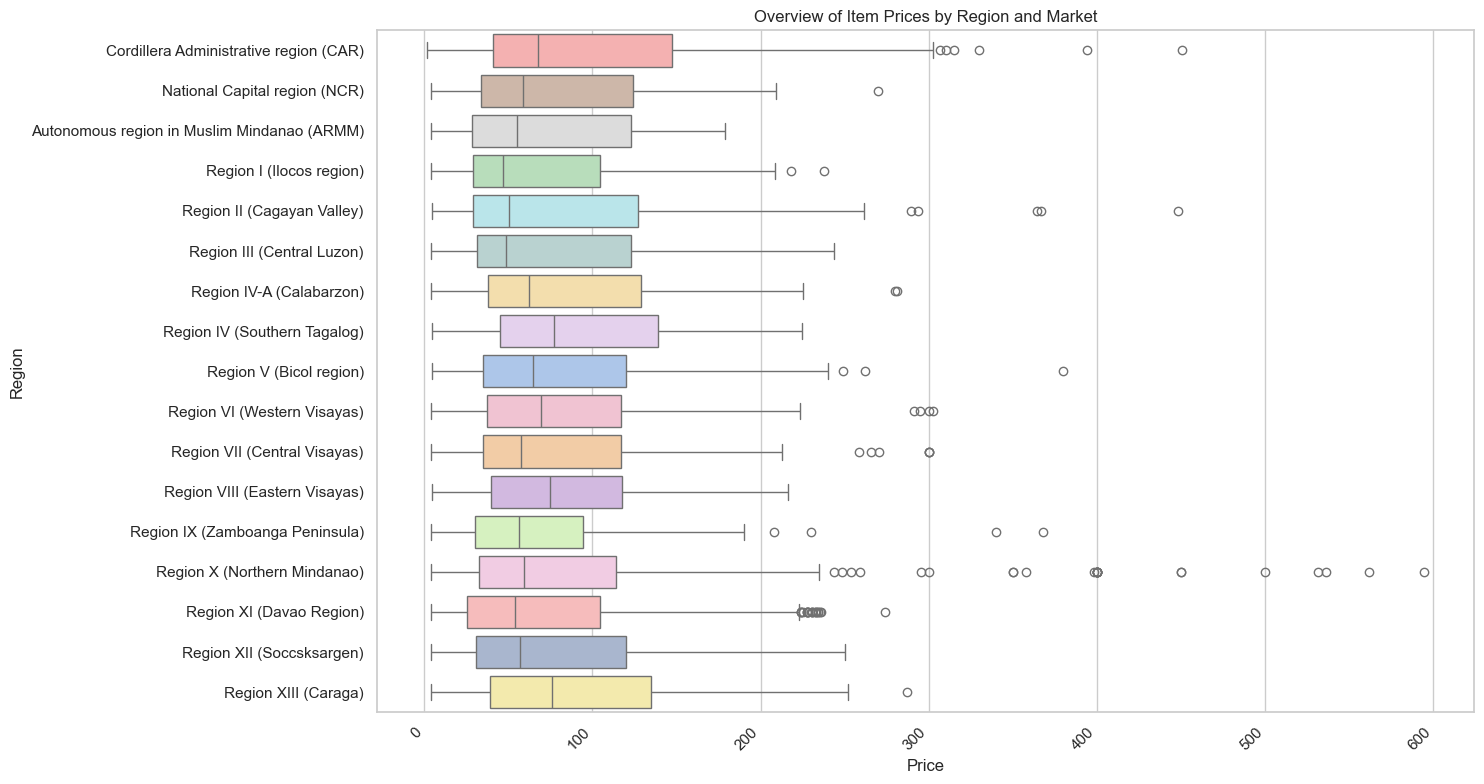

In [533]:
# Define the desired order of regions
region_order = [
    'Cordillera Administrative region (CAR)',
    'National Capital region (NCR)',
    'Autonomous region in Muslim Mindanao (ARMM)',
    'Region I (Ilocos region)',
    'Region II (Cagayan Valley)', 
    'Region III (Central Luzon)',
    'Region IV-A (Calabarzon)',
    'Region IV (Southern Tagalog)',
    'Region V (Bicol region)',
    'Region VI (Western Visayas)', 
    'Region VII (Central Visayas)',
    'Region VIII (Eastern Visayas)', 
    'Region IX (Zamboanga Peninsula)', 
    'Region X (Northern Mindanao)',
    'Region XI (Davao Region)', 
    'Region XII (Soccsksargen)',
    'Region XIII (Caraga)'
    ]

# Set up the plot
plt.figure(figsize=(15, 8))

# Create a boxplot with seaborn
sns.boxplot(
    data=clean_pfp,
    x='Price', 
    y='Region',
    hue='Region', 
    palette=colors,
    order=region_order
)

# Customize the plot
plt.title('Overview of Item Prices by Region and Market')
#plt.xlabel('Region')
plt.xlabel('Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

#### Histogram:
- Used to the distribution of the prices in the dataset. 

#### Insights:
- Most products in the dataset are less than 100 pesos which is the reason the distribution is Right Skewed. 
- The prices only range from 0 to 300 pesos which indicates that the goods available in the dataset only focusses on basic necessities.

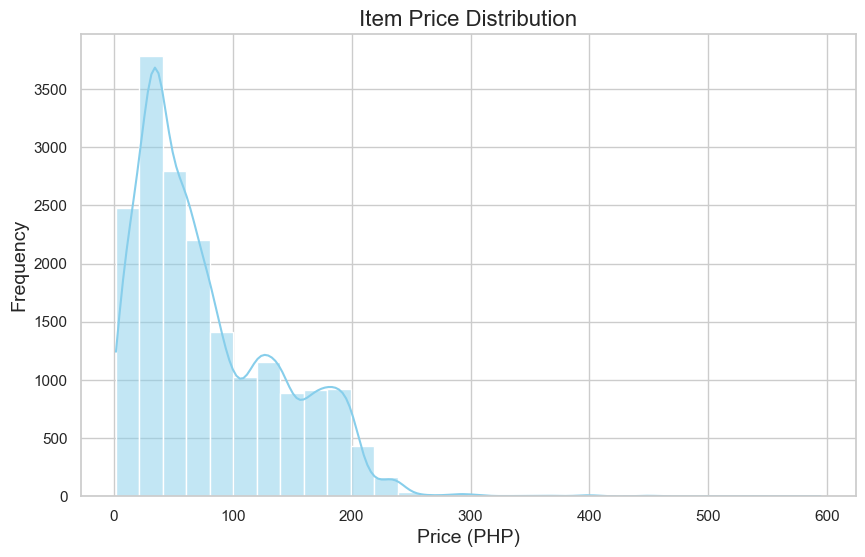

In [534]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a histogram of price values
plt.figure(figsize=(10, 6))
sns.histplot(clean_pfp['Price'], bins=30, color='skyblue', kde=True)

# Add titles and labels
plt.title('Item Price Distribution', fontsize=16)
plt.xlabel('Price (PHP)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()


#### Line Graph
- Used to show the average price trends of all items from 2000 to 2017. 
- Used to visualize price spikes over the years

#### Insights
- The prices was stable during year 2000 to 2007 but sudden increase occur in the later years. This may be due to price inflation of goods. 
- The price shows an upward trend, which indicates contionous increase over the years. 

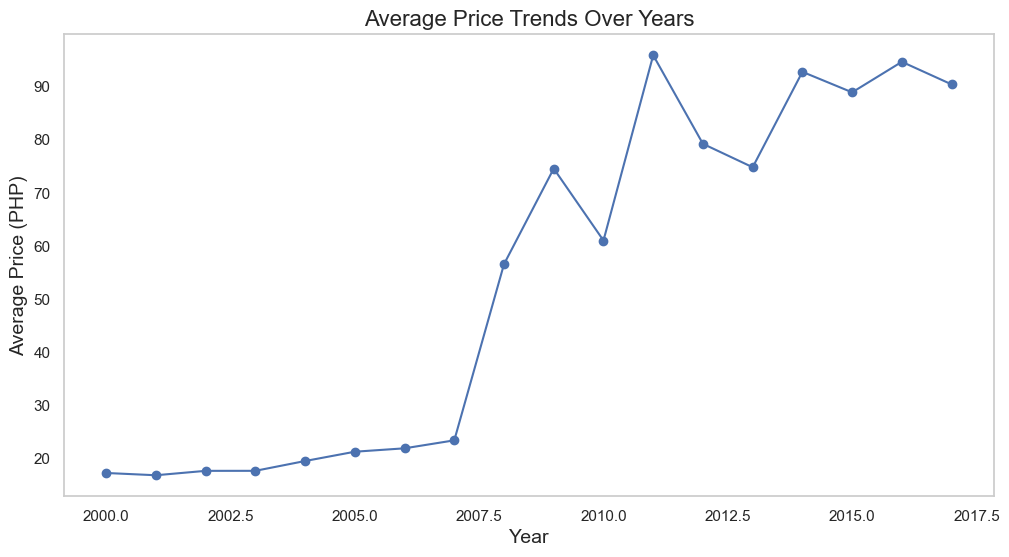

In [535]:
# Calculate average price per year
yearly_average_price = clean_pfp.groupby('Year')['Price'].mean()

# Create the line plot
plt.figure(figsize=(12, 6))
yearly_average_price.plot(kind='line', marker='o')
plt.title('Average Price Trends Over Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Price (PHP)', fontsize=14)
plt.grid()
plt.show()


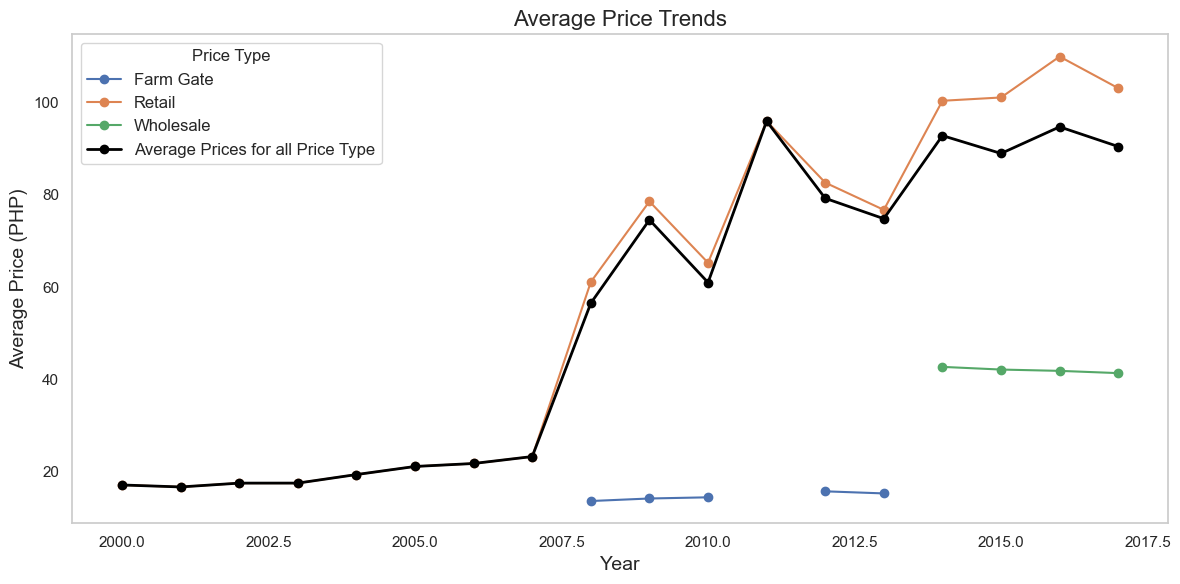

In [536]:
# Calculate average price per year and price type
yearly_average_price_type = clean_pfp.groupby(['Year', 'Price Type'])['Price'].mean().unstack()

# Calculate global average price per year
yearly_average_price = clean_pfp.groupby('Year')['Price'].mean()

# Create the line plot
plt.figure(figsize=(12, 6))

# Plot average price by price type
yearly_average_price_type.plot(kind='line', marker='o', ax=plt.gca())

# Plot global average price
yearly_average_price.plot(kind='line', marker='o', color='black', linewidth=2, label='Average Prices for all Price Type')

# Customize the plot
plt.title('Average Price Trends', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Price (PHP)', fontsize=14)
plt.grid()
plt.legend(title='Price Type', fontsize=12)
plt.tight_layout()  
plt.show()


# Insights

The Philippine Food Prices dataset provides an overview of the country’s concerns when it comes to food price and security. The information it  contains indicates the  country's overall economic conditions which could entail a large financial struggle of its people. To reiterate, this analysis aims to provide local market condition insights and how it relates to food security in order to enable policymakers to generate actions to mitigate economic shocks.
<br><br>
The Datasets categorical distribution presents that Vegetables and Fruit has the highest count which can be connected to Philippines' topical climate that is suitable for farming. This is closely followed by the "Meat, fish, and eggs" and "Cereal and tuber". Lastly, the "Pulses and nuts" were the least because some years were not recorded.
<br><br>
The general trend for the average price of all food categories is increasing across the years. However, it is worth noting that there has been a price drop around 2010-2013. Further investigation should be done for the country's inflation/deflation rate for the mentioned years.
<br><br>
Item price distribution across the is skwed to the left with most prices having values below 100, hence the mean price of 79.491791. However, there outliers can still be seen with some values reaching to 600. Regional prices also show disparities with each other; that is regions such as CAR having the highest average price compared to others based on the box plot. Additionally, regions that contains several outliers such as Region X should be investigated because it suggest massive fluctuations with its food prices, hence possible presence of food insecurity. 
<br><br>
Lastly, due to the nature of the dataset, a regression machine learning model will be used. This is to predict the food prices for whole nation and/or its regions for the coming years. This will serve as a forecast for the government in order to take action in mitigating food price fluctions for the Philippines.


# FINALS



## Info from Prelims

In [537]:
columns = ['Date', 'Product Name', 'Category', 'Price', 'Unit', 'Price Type',
       'Market Name', 'Region', 'Meta ID', 'Year']

In [538]:
clean_pfp.sample(5)

,Date,Product Name,Category,Price,Unit,Price Type,Market Name,Region,Meta ID,Year
2156,2015-04-15,Onions (red),vegetables and fruits,38.33,KG,Retail,Lingayen,Region I (Ilocos region),169_110_15_5,2015
5728,2015-01-15,Tomatoes,vegetables and fruits,63.54,KG,Retail,Iloilo City,Region VI (Western Visayas),175_114_15_5,2015
4817,2012-01-15,Meat (pork),"meat, fish and eggs",178.00,KG,Retail,Legazpi,Region V (Bicol region),174_140_15_5,2012
3654,2017-01-15,"Meat (chicken, whole)","meat, fish and eggs",144.46,KG,Retail,Tuguegarao,Region II (Cagayan Valley),170_125_15_5,2017
3385,2014-10-15,Onions (white),vegetables and fruits,60.00,KG,Retail,Tuguegarao,Region II (Cagayan Valley),170_111_15_5,2014


## Detecting outliers

In [539]:
def count_outliers_iqr(df):
    outliers_count = {}
    for column in df.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        num_outliers = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
        outliers_count[column] = num_outliers
    return outliers_count

# Count outliers for all numerical columns in the dataset
outliers_count = count_outliers_iqr(clean_pfp)

# Print the number of outliers for each column
for column, count in outliers_count.items():
    print(f"Number of outliers in column '{column}': {count}")

Number of outliers in column 'Price': 67


In [540]:
# Price count before removal of outliers
price_count = clean_pfp['Price'].count()
print(price_count)

18268


In [541]:
# removed outliers in price (di q sure if pwede)

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    cleaned_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return cleaned_df

# Apply outlier removal to the 'BHK' column
clean_pfp = remove_outliers_iqr(clean_pfp, 'Price')

In [542]:
price_count = clean_pfp['Price'].count()
print(price_count)

18201


## Feature Engineering and Selecting

In [543]:
unique_values_count = clean_pfp.nunique()

unique_values_count

Date             195
Product Name      17
Category           4
Price           8293
Unit               2
Price Type         3
Market Name       17
Region            17
Meta ID          335
Year              18
dtype: int64

In [544]:
def one_hot_encode(data, column):
    encoded = pd.get_dummies(data[column], drop_first= True)
    data = data.drop(column, axis = 1)
    data = data.join(encoded)
    return data

In [545]:
# one hot encode features with few unique values
clean_pfp = one_hot_encode(clean_pfp, ['Category', 'Unit', 'Price Type'] )

In [546]:
'''Using target encoding for product name and market 
name since they both affect the price, although they can
result to data leakage and potential overfitting'''

'''Experiment more with: 
1. only computing the mean of the price for training
set and apply it for test set'

2. Using cross validation to avoid data leakage

3. Different encoding

4. Experiment more with Feature Interaction/Adding a feature'''


# Target encoding for Product Name
product_target_mean = clean_pfp.groupby('Product Name')['Price'].mean()
clean_pfp['Product Name'] = clean_pfp['Product Name'].map(product_target_mean)

# Target encoding for Market Name
market_target_mean = clean_pfp.groupby('Market Name')['Price'].mean()
clean_pfp['Market Name'] = clean_pfp['Market Name'].map(market_target_mean)


In [547]:
# extracting features from Date (also using the Year column)
clean_pfp['Month'] = pd.to_datetime(clean_pfp['Date']).dt.month
clean_pfp['Day'] = pd.to_datetime(clean_pfp['Date']).dt.day
clean_pfp.drop(columns=['Date'], inplace=True)

In [548]:
# dropping Meta ID as it is not helpful as a feature
clean_pfp.drop(columns=['Meta ID'], inplace=True)

# dropping region as it is completely dependent with Market Name?
clean_pfp.drop(columns=['Region'], inplace=True)

clean_pfp

,Product Name,Price,Market Name,Year,"Category_meat, fish and eggs",Category_pulses and nuts,Category_vegetables and fruits,Unit_Unit,Price Type_Retail,Price Type_Wholesale,Month,Day
0,32.231959,29.20,89.992284,2010,False,False,False,False,True,False,1,15
1,32.231959,30.00,89.992284,2010,False,False,False,False,True,False,2,15
2,32.231959,30.00,89.992284,2010,False,False,False,False,True,False,3,15
3,32.231959,30.00,89.992284,2010,False,False,False,False,True,False,4,15
4,32.231959,30.00,89.992284,2010,False,False,False,False,True,False,5,15
...,...,...,...,...,...,...,...,...,...,...,...,...
18263,106.260450,186.92,89.303702,2016,True,False,False,False,True,False,12,15
18264,106.260450,181.05,89.303702,2017,True,False,False,False,True,False,1,15
18265,106.260450,180.00,89.303702,2017,True,False,False,False,True,False,2,15
18266,106.260450,180.00,89.303702,2017,True,False,False,False,True,False,3,15


In [549]:
clean_pfp['Product_Market_Interaction'] = clean_pfp['Product Name'] * clean_pfp['Market Name']
clean_pfp

,Product Name,Price,Market Name,Year,"Category_meat, fish and eggs",Category_pulses and nuts,Category_vegetables and fruits,Unit_Unit,Price Type_Retail,Price Type_Wholesale,Month,Day,Product_Market_Interaction
0,32.231959,29.20,89.992284,2010,False,False,False,False,True,False,1,15,2900.627597
1,32.231959,30.00,89.992284,2010,False,False,False,False,True,False,2,15,2900.627597
2,32.231959,30.00,89.992284,2010,False,False,False,False,True,False,3,15,2900.627597
3,32.231959,30.00,89.992284,2010,False,False,False,False,True,False,4,15,2900.627597
4,32.231959,30.00,89.992284,2010,False,False,False,False,True,False,5,15,2900.627597
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18263,106.260450,186.92,89.303702,2016,True,False,False,False,True,False,12,15,9489.451492
18264,106.260450,181.05,89.303702,2017,True,False,False,False,True,False,1,15,9489.451492
18265,106.260450,180.00,89.303702,2017,True,False,False,False,True,False,2,15,9489.451492
18266,106.260450,180.00,89.303702,2017,True,False,False,False,True,False,3,15,9489.451492


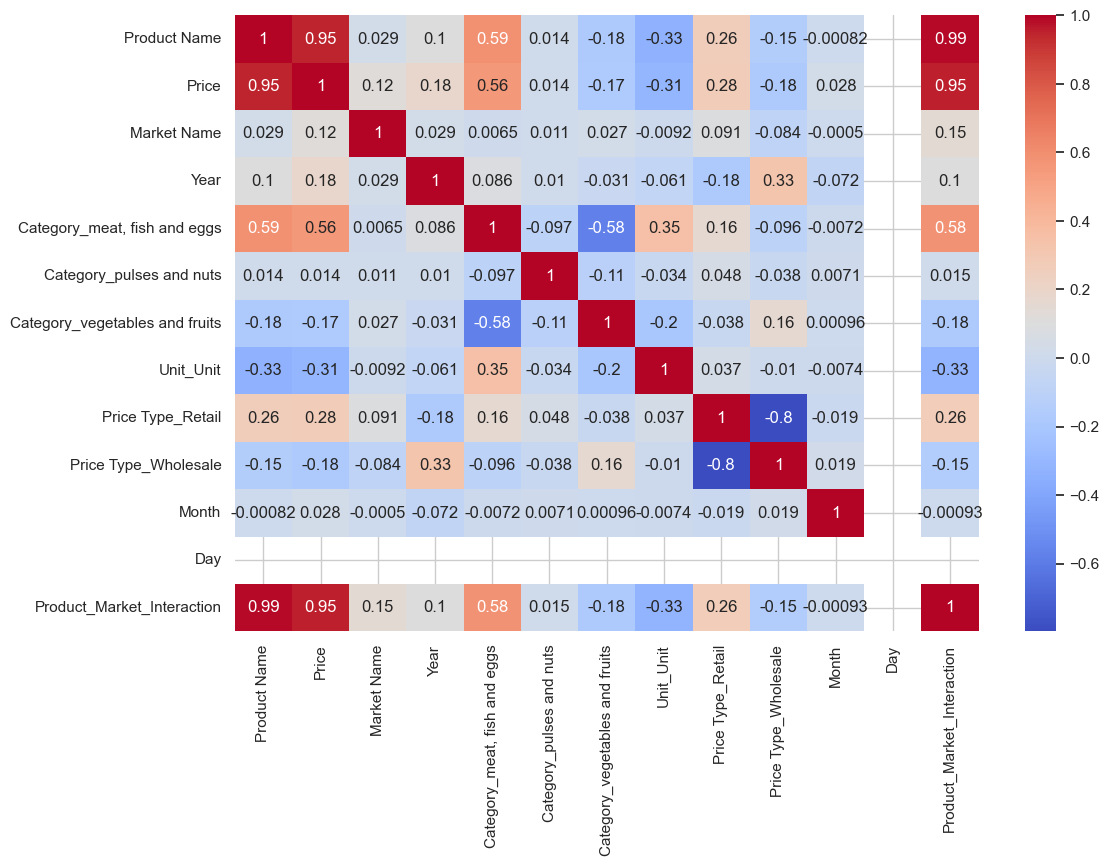

In [550]:
correlation_matrix = clean_pfp.corr()

plt.figure(figsize=(12, 8))
# Display the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

## Training the Model

In [551]:
# Splitting the dataset

from sklearn.model_selection import train_test_split

X = clean_pfp.drop(columns=['Price'])  # Features
y = clean_pfp['Price']                 # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [552]:
# Standardize
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

In [553]:
# Training
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_standardized, y_train)

y_pred = model.predict(X_test_standardized)


In [554]:
# Evaluate

from sklearn.metrics import mean_squared_error, r2_score

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 238.97
Coefficient of determination: 0.93


### Qualitative Eval

In [555]:
sample_data = X.iloc[5]
sample_data

Product Name                        32.231959
Market Name                         89.992284
Year                                     2010
Category_meat, fish and eggs            False
Category_pulses and nuts                False
Category_vegetables and fruits          False
Unit_Unit                               False
Price Type_Retail                        True
Price Type_Wholesale                    False
Month                                       6
Day                                        15
Product_Market_Interaction        2900.627597
Name: 5, dtype: object

In [556]:
sample_data_standardized = scaler.transform(sample_data.values.reshape(1,-1))

c:\Users\Sara Limeta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [557]:
model_rent_forecast = model.predict(sample_data_standardized)[0]
model_rent_forecast

33.23655059719873

In [558]:
y.iloc[5]

30.0

In [559]:
## Check for overfitting

# Training performance
train_pred = model.predict(X_train_standardized)
train_mae = mean_squared_error(y_train, train_pred)
train_r2 = r2_score(y_train, train_pred)

# Test performance
test_pred = model.predict(X_test_standardized)
test_mae = mean_squared_error(y_test, test_pred)
test_r2 = r2_score(y_test, test_pred)

# Print results
print(f"Training MAE: {train_mae}, R2: {train_r2}")
print(f"Test MAE: {test_mae}, R2: {test_r2}")



Training MAE: 268.6022590803685, R2: 0.9199057440289506
Test MAE: 238.97499769280725, R2: 0.9264279991941743


In [560]:
# Check for overfitting
if train_r2 - test_r2 > 0.2:  # Example threshold
    print("Potential overfitting detected: Training R2 is much higher than Test R2.")
else:
    print("Not overfitting.")

Not overfitting.
